# E**** Ads Take-home Data Project
Jingjing Lin (isjingjing.lin@gmail.com)  

Please refer to << Esquire Ads Project Answer.pdf >> for Questions 2&3

## i. data preparation

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import warnings
import locale
warnings.filterwarnings('ignore')

#### 1.1 load data

In [102]:
sales = pd.read_csv("Project Data.txt", delimiter = "\t")

In [103]:
sales.head(5)

,full address,sale amount,product type,store name
0,"100 B Legacy Drive Tuscumbia, AL 35674",None,Comforter,Goss Furniture
1,"100 Co Rd 445 Killen, Alabama 35645",264.5,Bedding,Katz World
2,"100 Co Rd 646 Rogersville, AL 35652",933.99,Mattress,Katz World
3,"100 Hampton Circle Muscle Shoals, AL 35661",$508,Mattress,Dart Mattress
4,1001 Buena Vista Ave Muscle Shoals. AL 35661,964.99,Comforter,Katz World


In [104]:
##rename
sales.columns = ['full_address', 'sale_amount', 'product_type','store_name']

In [105]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   full_address  438 non-null    object
 1   sale_amount   427 non-null    object
 2   product_type  438 non-null    object
 3   store_name    438 non-null    object
dtypes: object(4)
memory usage: 13.8+ KB


#### 1.2 fix "sale amount" column - (missing value, data type)

In [106]:
sales.sale_amount.unique()[0:50]

array(['None', '264.5', '933.99', '$508 ', '964.99', '853.5', '156.82',
       '201.38', '299.71', '443.48', '$544.87 ', '849.64', '$390.57 ',
       '$595.50 ', '302.5', '520.5', '132.25', '229', '$749 ', '$528.50 ',
       '$333.23 ', '666.5', '$324 ', '337.97', '522', '155.5', '220.99',
       '771.99', '-504.5', '691.99', '400.5', '372.5', '728.44', '80.5',
       '224', 'O831.84', nan, '664', '985.46', '106.5', '762.5', '$116 ',
       '646.99', '$533.99 ', '$230.44 ', '$281.73 ', '$756.99 ',
       '$94.50 ', '$876.99 ', '865'], dtype=object)

In [107]:
## Find input are inconsistent, goal: unify the form of price: xxx.xx
## There are some inputs start with "O" and will be removed

In [108]:
# remove $
sales['sale_amount'] = sales['sale_amount'].str.replace('$', '')
# convert datatype from object to float
sales['sale_amount'] = pd.to_numeric(sales['sale_amount'] , errors='coerce')
# Replace "nan" to zero
sales['sale_amount'] = sales['sale_amount'].fillna(0)

In [109]:
sales.head(5)

,full_address,sale_amount,product_type,store_name
0,"100 B Legacy Drive Tuscumbia, AL 35674",0.00,Comforter,Goss Furniture
1,"100 Co Rd 445 Killen, Alabama 35645",264.50,Bedding,Katz World
2,"100 Co Rd 646 Rogersville, AL 35652",933.99,Mattress,Katz World
3,"100 Hampton Circle Muscle Shoals, AL 35661",508.00,Mattress,Dart Mattress
4,1001 Buena Vista Ave Muscle Shoals. AL 35661,964.99,Comforter,Katz World


In [10]:
# convert to currency #### later

#k = sales
#k['sale_amount'] = k.apply(lambda x : locale.currency(x['sale_amount'], grouping=True), axis = 1)


### 2. Calculate the following key metrics, along with any data visualizations, graphics, dashboards, etc. that you feel would be helpful if you were providing the results of your analysis to a client or co-worker.

In [110]:
org_data = sales

In [111]:
org_data.head(5)

,full_address,sale_amount,product_type,store_name
0,"100 B Legacy Drive Tuscumbia, AL 35674",0.00,Comforter,Goss Furniture
1,"100 Co Rd 445 Killen, Alabama 35645",264.50,Bedding,Katz World
2,"100 Co Rd 646 Rogersville, AL 35652",933.99,Mattress,Katz World
3,"100 Hampton Circle Muscle Shoals, AL 35661",508.00,Mattress,Dart Mattress
4,1001 Buena Vista Ave Muscle Shoals. AL 35661,964.99,Comforter,Katz World


####  Q1.a Count of Transactions and Total Sales for each store

In [155]:
total_sales = sum (org_data['sale_amount'])

In [173]:
locale.setlocale(locale.LC_ALL,'en_US.UTF-8' )
store_stats = pd.DataFrame()
store_stats['transactions_no'] = org_data.groupby(["store_name"],group_keys=False).count()['full_address']
store_stats['total_sale'] = org_data.groupby(["store_name"],group_keys=False).sum()['sale_amount']
store_stats['margins'] = round((org_data.groupby(["store_name"],group_keys=False).sum()['sale_amount'] / total_sales)*100, 2)

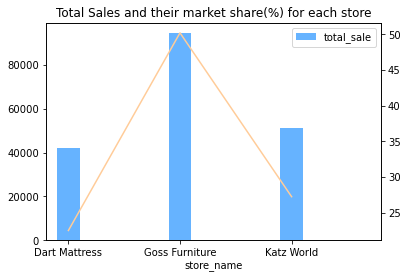

In [197]:
width = .2
store_stats[['total_sale']].plot(kind='bar',width = width, color = '#66b3ff', title = "Total Sales and their market share(%) for each store")
store_stats['margins'].plot(secondary_y=True,label = 'margin', color = '#ffcc99')

ax = plt.gca()
plt.xlim([-width, len(store_stats['total_sale'])-width])

plt.show()

In [161]:
# convert to currency 
store_stats['margins'] = store_stats['margins'].astype(str) + '%'
store_stats['total_sale'] = store_stats.apply(lambda x : locale.currency(x['total_sale'], grouping=True), axis = 1)
store_stats

,transactions_no,total_sale,margins
store_name,,,
Dart Mattress,123,"$42,295.40",22.52%
Goss Furniture,209,"$94,336.30",50.22%
Katz World,106,"$51,204.16",27.26%


#### Q1.b Count of Transactions and Total Sales for each product type

In [183]:
store_stats_1 = pd.DataFrame()
store_stats_1['transactions_no'] = org_data.groupby(["product_type"],group_keys=False).count()['full_address']
store_stats_1['total_sale'] = org_data.groupby(["product_type"],group_keys=False).sum()['sale_amount']
store_stats_1['margins'] = round((org_data.groupby(["product_type"],group_keys=False).sum()['sale_amount'] / total_sales)*100, 2)

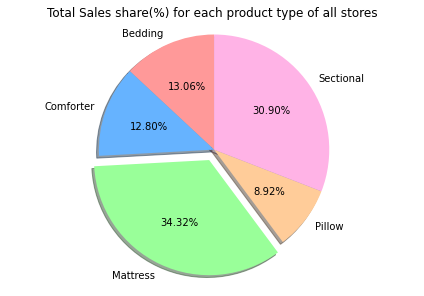

In [200]:
# Pie chart
labels = list(store_stats_1.index)
# only "explode" the largest slice 
explode = (0, 0, 0.1, 0, 0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6']
fig1, ax1 = plt.subplots()
ax1.pie(store_stats_1['total_sale'], explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Total Sales share(%) for each product type of all stores")
plt.show()

In [174]:
store_stats_1['margins'] = store_stats_1['margins'].astype(str) + '%'
# convert to currency 
store_stats_1['total_sale'] = store_stats_1.apply(lambda x : locale.currency(x['total_sale'], grouping=True), axis = 1)
store_stats_1

,transactions_no,total_sale,margins
product_type,,,
Bedding,95,"$24,527.26",13.06%
Comforter,60,"$24,044.65",12.8%
Mattress,122,"$64,460.89",34.32%
Pillow,63,"$16,760.32",8.92%
Sectional,98,"$58,042.74",30.9%


#### Q1.c Average sale amount for each product type

In [114]:
store_stats_1['avg_sale'] = org_data.groupby(["product_type"],group_keys=False).mean()['sale_amount']
store_stats_1['avg_sale'] = store_stats_1.apply(lambda x : locale.currency(x['avg_sale'], grouping=True), axis = 1)
store_stats_1

,transactions_no,total_sale,avg_sale
product_type,,,
Bedding,95,"$24,527.26",$258.18
Comforter,60,"$24,044.65",$400.74
Mattress,122,"$64,460.89",$528.37
Pillow,63,"$16,760.32",$266.04
Sectional,98,"$58,042.74",$592.27


#### Q1.d For each of the 3 stores, calculate the Total Sales of each product

In [115]:
store_stats_2 = pd.DataFrame()
store_stats_2['total_sale'] = org_data.groupby(["store_name","product_type"],group_keys=False).sum()['sale_amount']
store_stats_2['total_sale'] = store_stats_2.apply(lambda x : locale.currency(x['total_sale'], grouping=True), axis = 1)
store_stats_2

total_sale
store_name     product_type            
Dart Mattress  Bedding        $7,501.71
               Comforter      $4,172.46
               Mattress      $16,737.38
               Pillow        $13,883.85
Goss Furniture Bedding       $10,906.49
               Comforter     $14,179.55
               Mattress      $25,925.74
               Pillow         $2,876.47
               Sectional     $40,448.05
Katz World     Bedding        $6,119.06
               Comforter      $5,692.64
               Mattress      $21,797.77
               Sectional     $17,594.69

In [123]:
# Combine all information
store_stats_2['avg_sale'] = org_data.groupby(["store_name","product_type"],group_keys=False).mean()['sale_amount']
store_stats_2['avg_sale'] = store_stats_2.apply(lambda x : locale.currency(x['avg_sale'], grouping=True), axis = 1)

store_stats_2['transactions_no'] = org_data.groupby(["store_name","product_type"],group_keys=False).count()['full_address']
store_stats_2

total_sale avg_sale  transactions_no
store_name     product_type                                      
Dart Mattress  Bedding        $7,501.71  $312.57               24
               Comforter      $4,172.46  $347.70               12
               Mattress      $16,737.38  $464.93               36
               Pillow        $13,883.85  $272.23               51
Goss Furniture Bedding       $10,906.49  $242.37               45
               Comforter     $14,179.55  $393.88               36
               Mattress      $25,925.74  $540.12               48
               Pillow         $2,876.47  $239.71               12
               Sectional     $40,448.05  $594.82               68
Katz World     Bedding        $6,119.06  $235.35               26
               Comforter      $5,692.64  $474.39               12
               Mattress      $21,797.77  $573.63               38
               Sectional     $17,594.69  $586.49               30

### 3. Q3 Clean the address field by separating it into columns for Street Address, City, State, and Zipcode

In [117]:
#function: states abbrevations 
import re
def stateNames(fullName):   
    states = {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'American Samoa': 'AS',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Guam': 'GU',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Northern Mariana Islands':'MP',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Puerto Rico': 'PR',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virgin Islands': 'VI',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'
    }
        
    if fullName is not None:
        if fullName in states:
            return states[fullName]
        else:
            return fullName    
    else:
        return None


# e.g.
# -> stateNames('Alaba') 
# -> .str.replace('.', '')

In [118]:
# if you are the first time runing this code, runing the following sentence
# %pip install pgeocode

In [119]:
#function: track back the city and state name based on zipcode
import pgeocode
nomi = pgeocode.Nominatim('us')
def city_finder(zipcode):
    state = nomi.query_postal_code(zipcode)['state_code']
    city = nomi.query_postal_code(zipcode)['place_name'] 
    return state, city

In [120]:
address = pd.DataFrame()
address = org_data['full_address'].str.rsplit(r" ", 3, expand=True)
address[1] = address[1].str.replace(',', '').str.replace('.', '')
address.columns = ['Street Address', 'City','State','Zipcode']
# fix "state" column
address['State'] = address['State'].str.replace('.', '')
address['State'] = address.apply(lambda x: stateNames(x['State']),axis = 1 )
address['State'] = address.apply(lambda x: ""
                                         if len(x['State']) > 2 
                                         else x['State'],
                                 axis = 1)
# track back state name
address['State'] = address.apply(lambda x: city_finder(x['Zipcode'][:5])[0]
                                                  if x['State'] == ""  
                                                 else x['State'],
                                 axis = 1)
# track back city name
address['City'] = address.apply(lambda x: city_finder(x['Zipcode'][:5])[1]
                                                  if x['City'] == ""  
                                                 else x['City'],
                                 axis = 1)
address['State']  = address['State'].str.upper()
#store_stats_1.apply(lambda x : locale.currency(x['total_sale'], grouping=True), axis = 1)
address.tail(5)

,Street Address,City,State,Zipcode
433,98 Watersedge Drive,Florence,AL,35634
434,985 Co Rd 200,Florence,AL,35633
435,989 Co Rd 130,Killen,AL,35645-4383
436,989 Lost Creek Road,Russellville,AL,35653
437,9895 CO Rd 6,Florence,AL,35633


In [121]:
cleaned_df = pd.concat([address,org_data], axis = 1)
cleaned_df= cleaned_df.drop(columns=['full_address'])
cleaned_df['sale_amount'] = cleaned_df.apply(lambda x : locale.currency(x['sale_amount'], grouping=True), axis = 1)
cleaned_df

,Street Address,City,State,Zipcode,sale_amount,product_type,store_name
0,100 B Legacy Drive,Tuscumbia,AL,35674,$0.00,Comforter,Goss Furniture
1,100 Co Rd 445,Killen,AL,35645,$264.50,Bedding,Katz World
2,100 Co Rd 646,Rogersville,AL,35652,$933.99,Mattress,Katz World
3,100 Hampton Circle Muscle,Shoals,AL,35661,$508.00,Mattress,Dart Mattress
4,1001 Buena Vista Ave Muscle,Shoals,AL,35661,$964.99,Comforter,Katz World
...,...,...,...,...,...,...,...
433,98 Watersedge Drive,Florence,AL,35634,$772.18,Sectional,Goss Furniture
434,985 Co Rd 200,Florence,AL,35633,$226.50,Sectional,Katz World
435,989 Co Rd 130,Killen,AL,35645-4383,$634.99,Comforter,Katz World
436,989 Lost Creek Road,Russellville,AL,35653,$833.00,Pillow,Dart Mattress
